<h1 align="center"> The Sparks Fundation </h1>
<h2 align="center"> Task 1 (Computer Vision)</h2>
<h2 align="center"> OCR </h2>
<h5 align = "right"> by- </h5>
<h5 align = "right"> Shreeman Agrawal </h5>

### Importing the Required Libraries

In [11]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

We connect pytesseract to the executable file we get by downloading its pre-built binaries from
link - https://github.com/UB-Mannheim/tesseract/wiki

In [12]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

Loading the image to test this

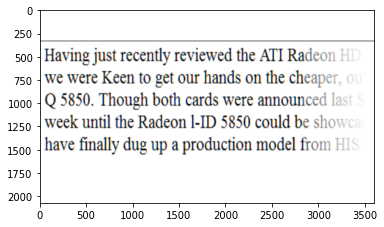

In [13]:
im = cv2.imread(r"q.png")
plt.imshow(im)
plt.show()

Using the tesseract inbuilt function image_to_string to see what the model has found in the image provided

In [14]:
img_string = pytesseract.image_to_string(im)
print(img_string)

Having just recently reviewed the ATT Radeo!
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced

week until the Radeon |-ID 5850 could be she
have finally dug up a production model from



#### Since the image is not fully clear the results are pretty nice with just the exception of the blurry letters at the right end.<br>
Seeing what predictions it has made and at which coordinates. The output is of format the character followed by x,y,w,h coordinates

In [15]:
img_boxes = pytesseract.image_to_boxes(im)
print(img_boxes)

H 52 1523 157 1658 0
a 163 1523 234 1623 0
v 208 1480 274 1665 0
i 234 1523 457 1665 0
n 353 1480 418 1665 0
g 457 1480 533 1623 0
j 563 1480 616 1665 0
u 621 1523 710 1623 0
s 715 1523 774 1623 0
t 780 1523 821 1644 0
r 868 1523 927 1623 0
e 927 1523 997 1623 0
c 1003 1523 1068 1623 0
e 1077 1480 1142 1665 0
n 1074 1523 1232 1623 0
t 1205 1480 1271 1665 0
l 1232 1523 1320 1665 0
y 1320 1480 1408 1623 0
r 1444 1523 1502 1623 0
e 1508 1523 1579 1623 0
v 1579 1523 1708 1665 0
i 1714 1523 1784 1623 0
e 1752 1523 1818 1665 0
w 1784 1523 1908 1623 0
e 1908 1523 1978 1623 0
d 1984 1523 2072 1665 0
t 2113 1523 2248 1665 0
h 2187 1523 2252 1665 0
e 2248 1523 2319 1623 0
A 2396 1523 2461 1658 0
T 2360 1523 2560 1658 0
T 2560 1523 2618 1658 0
R 2665 1523 2777 1658 0
a 2777 1523 2847 1623 0
d 2830 1523 2895 1665 0
e 2853 1523 3006 1665 0
o 3018 1523 3065 1601 0
! 3059 1523 3129 1615 0
w 52 1282 175 1382 0
e 175 1282 246 1382 0
w 293 1282 422 1382 0
e 368 1282 448 1382 0
r 422 1282 551 1382 0
e 55

In [16]:
imgH, imgW, _ = im.shape
print(im.shape)

(2072, 3604, 3)


#### Using opencv to visualize the bounding boxes and the characters they represent on the image -

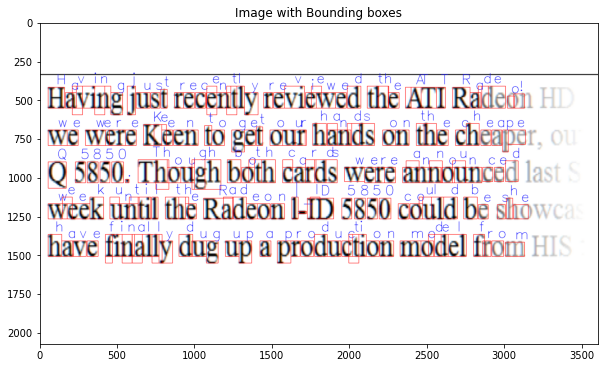

In [17]:
for boxes in img_boxes.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    c = boxes[0]
    cv2.rectangle(im, (x , imgH - y), (w , imgH - h), (255,0,0), 2)
    cv2.putText(im,c,(int(x + (w-x)/2) , int(imgH - h - 20)), cv2.FONT_HERSHEY_SIMPLEX, 3,(0,0,255),2)
figure = plt.figure(figsize=(10,12))
plt.imshow(im)
plt.title("Image with Bounding boxes")
plt.show()

#### Trying the same on a clearer image gives much better results as we can see below

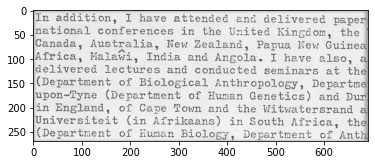

In [18]:
im = cv2.imread(r"b.png")
plt.imshow(im)
plt.show()

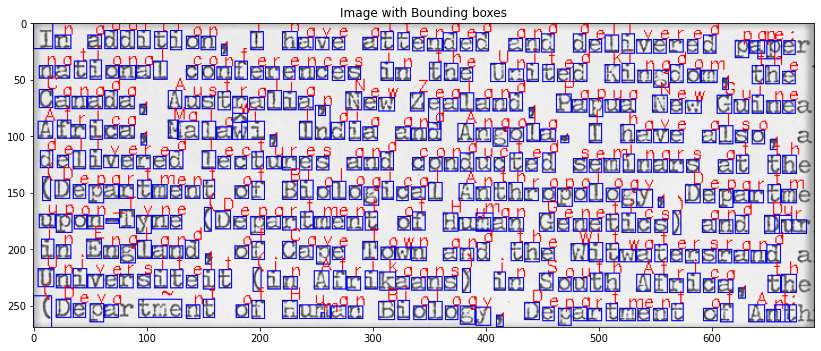

In [19]:
im = cv2.imread(r"b.png")
img_boxes = pytesseract.image_to_boxes(im)
imgH, imgW, _ = im.shape
for boxes in img_boxes.splitlines():
    boxes = boxes.split(' ')
    x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
    c = boxes[0]
    cv2.rectangle(im, (x , imgH - y), (w , imgH - h), (255,0,0), 1)
    cv2.putText(im,c,(int(x + (w-x)/2) , int(imgH - h - 1)), cv2.FONT_HERSHEY_SIMPLEX, .5,(0,0,255),1)
figure = plt.figure(figsize=(14,16))
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
plt.title("Image with Bounding boxes")
plt.show()

In [20]:
im = cv2.imread(r"b.png")
img_c = pytesseract.image_to_string(im)
print(img_c)

In addition, I have attended and delivered pape:
national conferences in the United Kingdom, the
Canada, Australia, New Zealand, Papua New Guine
Africa, Malawi, India and Angola. I have also,

delivered lectures and conducted seminars at th
(Department of Biological Anthropology, Departm
upon-Tyne (Department of Human Genetics) and Dur
in England, of Cave Town and the Witwatersrand

Universiteit (in Afrikaans) in South Africa, th
(Deva nt of Human Biology, Department of Ant:

 



#### On a clearer image it works much better and is only having problems at the right end of the page

### Now lets see how it performs on video input

In [21]:
# press escape key to close
cap = cv2.VideoCapture('test.mp4')
count = 0
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
result = cv2.VideoWriter('res.mp4',cv2.VideoWriter_fourcc(*'MP4V') , 30.0, (1440,900))
while True:
    ret , img = cap.read()
    if ret!=True:
        result.release()
        break
    count = count + 1
    if (count%5 != 0):
        continue
    img = cv2.resize(img,(1440,900))
    height, width, _ = img.shape
    
    img_boxes = pytesseract.image_to_boxes(img)
    
    for boxes in img_boxes.splitlines():
        boxes = boxes.split(' ')
        x,y,w,h = int(boxes[1]),int(boxes[2]),int(boxes[3]),int(boxes[4])
        if((height - y) < 70):
            continue
        c = boxes[0]
        cv2.rectangle(img, (x , height - y), (w , height - h), (255,0,0), 2)
        cv2.putText(img,c,(int(x + (w-x)/2) , int(height - h - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),2)
    
    cv2.imshow('Image', img)
    result.write(img)
    key = cv2.waitKey(1)
    if key==27:
        break


cap.release()
result.release()
cv2.destroyAllWindows()

As we can see it works pretty well on video input too without much delay

There are many more object detection algorithms that work better with OCR but this is one of the most versatile which is also available in multiple languages.


In [5]:
from IPython.display import Video

Video("res.mp4",width=1000, height=550)